In [1]:
import matplotlib.pyplot as plt
import requests
import yfinance as yf
import pandas as pd
import random
import os

In [2]:
# Loaded from https://www.arvopaperi.fi/porssi/indeksit/OMXHPI as did not find other sources for OMXHPI companies + tickers
# Also tried to scrape the names from the site but that was very painful. Did not feel like creating a selenium script, as those often don't work for very long time and I do not feel like debugging
data = pd.read_csv('data\OMXHPI.csv', header=0, delimiter=';')

In [3]:
data

,Osake,Hinta,Muutos,Osto,Myynti,Vaihto,Ylin,Alin,Päivitetty
0,Afarak Group,"0,437","-0,11428571428571438","0,436","0,4375","12086,367","0,4395","0,434",10.11.2023
1,Aktia Pankki A,"9,18","0,9900990099009885","9,18","9,2","516507,42","9,34","9,09",10.11.2023
2,Alisa Pankki,"0,188","-1,467505241090145","0,1882","0,1946","17382,0346","0,193","0,186",10.11.2023
3,Alma Media,"8,52","-0,6993006993007052","8,52","8,58","46415,08","8,66","8,5",10.11.2023
4,Anora Group,"4,175","-5,86245772266065","4,185","4,195","561008,81","4,435","4,155",10.11.2023
...,...,...,...,...,...,...,...,...,...
133,Wulff Group,"1,78","0,28169014084507693","1,78","1,79","4855,4","1,815","1,775",10.11.2023
134,Wärtsilä B,"11,415","-1,4674147604661345","11,42","11,435","9658592,61","11,66","11,31",10.11.2023
135,YIT,"1,793","-1,2121212121212133","1,789","1,792","424843,1665","1,81","1,77",10.11.2023
136,Ålandsbanken A,"31,8","-0,9345794392523387","31,8",32,"2597,3","32,2","31,8",10.11.2023


In [4]:
company_names = data['Osake'].tolist()

In [5]:
company_names

['Afarak Group',
 'Aktia Pankki A',
 'Alisa Pankki',
 'Alma Media',
 'Anora Group',
 'Apetit',
 'Aspo',
 'Aspocomp Group',
 'Atria A',
 'Biohit B',
 'Bittium',
 'Boreo',
 'CapMan',
 'Cargotec',
 'Citycon',
 'Componenta',
 'Consti',
 'Digia',
 'Digitalist Group',
 'Dovre Group',
 'Eezy',
 'Elecster A',
 'Elisa',
 'Endomines Finland',
 'Enento Group',
 'Enersense',
 'eQ',
 'Etteplan',
 'Evli',
 'Exel Composites',
 'F-Secure',
 'Finnair',
 'Fiskars A',
 'Fortum',
 'Glaston',
 'Gofore',
 'Harvia',
 'HKScan A',
 'Honkarakenne B',
 'Huhtamäki',
 'Ilkka2',
 'Incap',
 'Innofactor',
 'Investors House',
 'Kamux',
 'Kemira',
 'Keskisuomalainen A',
 'Kesko A',
 'Kesko B',
 'Kesla A',
 'KH Group',
 'Kojamo',
 'Kone',
 'Konecranes',
 'Koskisen',
 'Kreate Group',
 'Lassila & Tikanoja',
 'Lehto Group',
 'Mandatum',
 'Marimekko',
 'Martela A',
 'Metso',
 'Metsä Board A',
 'Metsä Board B',
 'Musti Group',
 'Neste',
 'NoHo Partners',
 'Nokia',
 'Nokian Renkaat',
 'Nordea Bank',
 'Nurminen Logistics',
 'O

In [6]:
tickers = []

# After realizing scraping Nasdaq.com NOR arvopaperi was not possible (at least easily) had to come up with a different solution
# https://stackoverflow.com/questions/38967533/retrieve-company-name-with-ticker-symbol-input-yahoo-or-google-api
def get_ticker(company_name):
    url = "https://query2.finance.yahoo.com/v1/finance/search"
    user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
    params = {"q": company_name, "quotes_count": 1, "country": "United States"}

    res = requests.get(url=url, params=params, headers={'User-Agent': user_agent})
    data = res.json()

    # Check if 'quotes' key exists and is not empty
    if 'quotes' in data and data['quotes']:
        company_code = data['quotes'][0]['symbol']
        return company_code
    else:
        return None

In [7]:
for company in company_names:
    tickers.append(get_ticker(company))

In [8]:
tickers

['AFAGR.HE',
 None,
 'ALISA.HE',
 'ALMA.HE',
 'ANORA.HE',
 'APETIT.HE',
 'ASPO.HE',
 'ACG1V.HE',
 None,
 None,
 'BITTI.HE',
 'BOREO.HE',
 'CAPMAN.HE',
 'CGCBV.HE',
 'CTY1S.HE',
 'CTH1V.HE',
 'CONSTI.HE',
 'DIGIA.HE',
 'DIGIGR.HE',
 'DOV1V.HE',
 'EEZY.HE',
 None,
 'ELISA.HE',
 'PAMPALO.HE',
 'ENENTO.HE',
 'ESENSE.HE',
 'EQ',
 'EPL.SG',
 '0P0000ZPAD.F',
 'EXL1V.HE',
 'FSECURE.HE',
 'FIA1S.HE',
 None,
 'FORTUM.HE',
 'GLA1V.HE',
 'GOFORE.HE',
 'HARVIA.HE',
 None,
 None,
 None,
 'ILKKA2.HE',
 'ICP1V.HE',
 'IFA1V.HE',
 'INVEST.HE',
 'KAMUX.HE',
 'KEMIRA.HE',
 None,
 'KEK1.BE',
 'KEK.F',
 None,
 'KHG.HE',
 'KOJAMO.HE',
 'KNEBV.HE',
 'KCR.HE',
 'KOSKI.HE',
 'KREATE.HE',
 'LAT1V.HE',
 'LEHTO.HE',
 'MANTA.HE',
 'MEKKO.HE',
 None,
 'METSO.HE',
 None,
 None,
 'MUSTI.HE',
 'NESTE.HE',
 'NOHO.HE',
 'NOK',
 'TYRES.HE',
 'NDA-FI.HE',
 'NLG1V.HE',
 None,
 None,
 'OPTOMED.HE',
 None,
 None,
 '0P000151ZN.F',
 '0M2O.IL',
 'ORTHEX.HE',
 'OUT1V.HE',
 None,
 'PNA1V.HE',
 'PIHLIS.HE',
 'PON1V.HE',
 'PUMU.HE',

In [9]:
none_indices = []
none_company_names = []

# Iterate through tickers and collect None indices
for index, ticker in enumerate(tickers):
    if ticker is None:
        none_indices.append(index)

# Retrieve corresponding company names using None indices
for none_index in none_indices:
    if none_index < len(company_names):
        none_company_names.append(company_names[none_index])

# Print None indices and corresponding company names
print("None indices:", none_indices)
print("Corresponding company names:", none_company_names)

None indices: [1, 8, 9, 21, 32, 37, 38, 39, 46, 49, 60, 62, 63, 71, 72, 74, 75, 80, 89, 91, 97, 105, 109, 110, 123, 126, 134, 136, 137]
Corresponding company names: ['Aktia Pankki A', 'Atria A', 'Biohit B', 'Elecster A', 'Fiskars A', 'HKScan A', 'Honkarakenne B', 'Huhtamäki', 'Keskisuomalainen A', 'Kesla A', 'Martela A', 'Metsä Board A', 'Metsä Board B', 'Olvi A', 'Oma Säästöpankki', 'Oriola A', 'Oriola B', 'Ovaro Kiinteistösijoitus', 'Raisio V', 'Raute A', 'Saga Furs C', 'SRV Yhtiöt', 'Stockmann B', 'Stora Enso A', 'Tulikivi A', 'Vaisala A', 'Wärtsilä B', 'Ålandsbanken A', 'Ålandsbanken B']


In [10]:
# Manually searched tickers
ticker_mapping = {
    'Aktia_pankki_A': 'AKTIA.HE',
    'Atria_A': 'ATRAV.HE',
    'Biohit_B': 'BIOBV.HE',
    'Elecster_A': 'ELEAV.HE',
    'Fiskars_A': 'FSKRS.HE',
    'HKScan_A': 'HKSAV.HE',
    'Honkarakenne_B': 'HONBS.HE',
    'Huhtamäki': 'HUH1V.HE',
    'Keskisuomalainen_A': 'KSLAV.HE',
    'Kesla_A': 'KELAS.HE',
    'Martela_A': 'MARAS.HE',
    'Metsä_Board_A': 'METSA.HE',
    'Metsä_Board_B': 'METSB.HE',
    'Olvi_A': 'OLVAS.HE',
    'Oma_Säästöpankki': 'OMASP.HE',
    'Oriola_A': 'OKDAV.HE',
    'Oriola_B': 'OKDBV.HE',
    'Ovaro_Kiinteistösijoitus': 'OVARO.HE',
    'Raisio_V': 'RAIVV.HE',
    'Raute_A': 'RAUTE.HE',
    'Saga_Furs_C': 'SAGCV.HE',
    'SRV_Yhtiöt': 'SRV1V.HE',
    'Stockmann_B': 'STOCKA.HE',
    'Stora_Enso_A': 'STERV.HE',
    'Tulikivi_A': 'TULAV.HE',
    'Vaisala_A': 'VAIAS.HE',
    'Wärtsilä_B': 'WRT1V.HE',
    'Ålandsbanken_A': 'ALBAV.HE',
    'Ålandsbanken_B': 'ALBBV.HE'
}

In [11]:
for index, ticker in zip(none_indices, ticker_mapping.values()):
    tickers[index] = ticker

In [12]:
tickers

['AFAGR.HE',
 'AKTIA.HE',
 'ALISA.HE',
 'ALMA.HE',
 'ANORA.HE',
 'APETIT.HE',
 'ASPO.HE',
 'ACG1V.HE',
 'ATRAV.HE',
 'BIOBV.HE',
 'BITTI.HE',
 'BOREO.HE',
 'CAPMAN.HE',
 'CGCBV.HE',
 'CTY1S.HE',
 'CTH1V.HE',
 'CONSTI.HE',
 'DIGIA.HE',
 'DIGIGR.HE',
 'DOV1V.HE',
 'EEZY.HE',
 'ELEAV.HE',
 'ELISA.HE',
 'PAMPALO.HE',
 'ENENTO.HE',
 'ESENSE.HE',
 'EQ',
 'EPL.SG',
 '0P0000ZPAD.F',
 'EXL1V.HE',
 'FSECURE.HE',
 'FIA1S.HE',
 'FSKRS.HE',
 'FORTUM.HE',
 'GLA1V.HE',
 'GOFORE.HE',
 'HARVIA.HE',
 'HKSAV.HE',
 'HONBS.HE',
 'HUH1V.HE',
 'ILKKA2.HE',
 'ICP1V.HE',
 'IFA1V.HE',
 'INVEST.HE',
 'KAMUX.HE',
 'KEMIRA.HE',
 'KSLAV.HE',
 'KEK1.BE',
 'KEK.F',
 'KELAS.HE',
 'KHG.HE',
 'KOJAMO.HE',
 'KNEBV.HE',
 'KCR.HE',
 'KOSKI.HE',
 'KREATE.HE',
 'LAT1V.HE',
 'LEHTO.HE',
 'MANTA.HE',
 'MEKKO.HE',
 'MARAS.HE',
 'METSO.HE',
 'METSA.HE',
 'METSB.HE',
 'MUSTI.HE',
 'NESTE.HE',
 'NOHO.HE',
 'NOK',
 'TYRES.HE',
 'NDA-FI.HE',
 'NLG1V.HE',
 'OLVAS.HE',
 'OMASP.HE',
 'OPTOMED.HE',
 'OKDAV.HE',
 'OKDBV.HE',
 '0P000151ZN

In [13]:
# More manual work to update all 
filtered_tickers = [ticker for ticker in tickers if ticker and '.' in ticker and not ticker.endswith('.HE')]

print("Filtered tickers:", filtered_tickers)

Filtered tickers: ['EPL.SG', '0P0000ZPAD.F', 'KEK1.BE', 'KEK.F', '0P000151ZN.F', '0M2O.IL', 'SGRO.JK', 'SSAB-B.ST', 'A92Y.Z', 'ENUS.F', '1S0.F', 'TAL1T.TL', 'TELIA.ST']


In [14]:
filtered_indeces = []

for filtered_ticker in filtered_tickers:
    index = tickers.index(filtered_ticker)
    filtered_indeces.append(index)
    company_name = company_names[index]

    print(f"Company Name: {company_name}, Ticker: {filtered_ticker}, Index: {index}")

Company Name: Etteplan, Ticker: EPL.SG, Index: 27
Company Name: Evli, Ticker: 0P0000ZPAD.F, Index: 28
Company Name: Kesko A, Ticker: KEK1.BE, Index: 47
Company Name: Kesko B, Ticker: KEK.F, Index: 48
Company Name: Orion A, Ticker: 0P000151ZN.F, Index: 76
Company Name: Orion B, Ticker: 0M2O.IL, Index: 77
Company Name: Sampo A, Ticker: SGRO.JK, Index: 98
Company Name: SSAB A, Ticker: SSAB-B.ST, Index: 106
Company Name: SSAB B, Ticker: A92Y.Z, Index: 107
Company Name: Stora Enso R, Ticker: ENUS.F, Index: 111
Company Name: Suominen, Ticker: 1S0.F, Index: 112
Company Name: Tallink Grupp, Ticker: TAL1T.TL, Index: 115
Company Name: Telia Company, Ticker: TELIA.ST, Index: 118


In [15]:
ticker_mapping2 = {
    'etteplan': 'ETTE.HE',
    'evli': 'EVLI.HE',
    'kesko_a': 'KESKOA.HE',
    'kesko_b': 'KESKOB.HE',
    'orion_a': 'ORNAV.HE',
    'orion_b': 'ORNBV.HE',
    'sampo_a': 'SAMPO.HE',
    'ssab_a': 'SSABAH.HE',
    'ssab_b': 'SSABBH.HE',
    'stora_enso_r': 'STERV.HE',
    'suominen': 'SUY1V.HE',
    'tallink': 'TALLINK.HE',
    'telia': 'TELIA1.HE'
}

In [16]:
for index, ticker in zip(filtered_indeces, ticker_mapping2.values()):
    tickers[index] = ticker

In [17]:
tickers

['AFAGR.HE',
 'AKTIA.HE',
 'ALISA.HE',
 'ALMA.HE',
 'ANORA.HE',
 'APETIT.HE',
 'ASPO.HE',
 'ACG1V.HE',
 'ATRAV.HE',
 'BIOBV.HE',
 'BITTI.HE',
 'BOREO.HE',
 'CAPMAN.HE',
 'CGCBV.HE',
 'CTY1S.HE',
 'CTH1V.HE',
 'CONSTI.HE',
 'DIGIA.HE',
 'DIGIGR.HE',
 'DOV1V.HE',
 'EEZY.HE',
 'ELEAV.HE',
 'ELISA.HE',
 'PAMPALO.HE',
 'ENENTO.HE',
 'ESENSE.HE',
 'EQ',
 'ETTE.HE',
 'EVLI.HE',
 'EXL1V.HE',
 'FSECURE.HE',
 'FIA1S.HE',
 'FSKRS.HE',
 'FORTUM.HE',
 'GLA1V.HE',
 'GOFORE.HE',
 'HARVIA.HE',
 'HKSAV.HE',
 'HONBS.HE',
 'HUH1V.HE',
 'ILKKA2.HE',
 'ICP1V.HE',
 'IFA1V.HE',
 'INVEST.HE',
 'KAMUX.HE',
 'KEMIRA.HE',
 'KSLAV.HE',
 'KESKOA.HE',
 'KESKOB.HE',
 'KELAS.HE',
 'KHG.HE',
 'KOJAMO.HE',
 'KNEBV.HE',
 'KCR.HE',
 'KOSKI.HE',
 'KREATE.HE',
 'LAT1V.HE',
 'LEHTO.HE',
 'MANTA.HE',
 'MEKKO.HE',
 'MARAS.HE',
 'METSO.HE',
 'METSA.HE',
 'METSB.HE',
 'MUSTI.HE',
 'NESTE.HE',
 'NOHO.HE',
 'NOK',
 'TYRES.HE',
 'NDA-FI.HE',
 'NLG1V.HE',
 'OLVAS.HE',
 'OMASP.HE',
 'OPTOMED.HE',
 'OKDAV.HE',
 'OKDBV.HE',
 'ORNAV.HE

In [18]:
filtered_tickers = [ticker for ticker in tickers if ticker and '.' in ticker and not ticker.endswith('.HE')]

print("Filtered tickers:", filtered_tickers)

none_indices = []
none_company_names = []

# Iterate through tickers and collect None indices
for index, ticker in enumerate(tickers):
    if ticker is None:
        none_indices.append(index)

# Retrieve corresponding company names using None indices
for none_index in none_indices:
    if none_index < len(company_names):
        none_company_names.append(company_names[none_index])

# Print None indices and corresponding company names
print("None indices:", none_indices)
print("Corresponding company names:", none_company_names)

Filtered tickers: []
None indices: []
Corresponding company names: []


In [19]:
random_tickers = random.sample(tickers, 3)

for ticker in random_tickers:
    # Construct the Ticker object
    stock = yf.Ticker(ticker)

    # Download historical data
    history = stock.history(period="max")

    # Print the ticker and its historical data
    print(f"{ticker} Historical Data:")
    print(history)
    print("\n" + "=" * 50 + "\n")

KCR.HE Historical Data:
                                Open       High        Low      Close  Volume  \
Date                                                                            
2000-01-03 00:00:00+02:00   3.782731   3.882277   3.633413   3.882277  778016   
2000-01-04 00:00:00+02:00   3.882277   3.971868   3.673232   3.683186  360080   
2000-01-05 00:00:00+02:00   3.683186   3.723004   3.543822   3.683186  383232   
2000-01-07 00:00:00+02:00   3.608526   3.683186   3.484095   3.583640  274720   
2000-01-10 00:00:00+02:00   3.533868   3.603550   3.533868   3.603550  249520   
...                              ...        ...        ...        ...     ...   
2023-11-07 00:00:00+02:00  31.610001  31.809999  31.420000  31.629999  111400   
2023-11-08 00:00:00+02:00  31.379999  31.980000  30.690001  31.940001  443846   
2023-11-09 00:00:00+02:00  32.209999  33.130001  31.930000  33.099998  144067   
2023-11-10 00:00:00+02:00  32.820000  32.939999  32.290001  32.650002  110378   
2023

In [20]:
result_folder = 'result_omxhpi'

for ticker in tickers:
    stock = yf.Ticker(ticker)
    history = stock.history(period="max")

    if not os.path.exists(result_folder):
        os.makedirs(result_folder)

    # Save the history as a .txt file
    file_path = os.path.join(result_folder, f"{ticker}.txt")
    history.to_csv(file_path, sep=',')  # Save as comma-separated values
    print(f"Saved history for {ticker} to {file_path}")

Saved history for AFAGR.HE to result\AFAGR.HE.txt
Saved history for AKTIA.HE to result\AKTIA.HE.txt
Saved history for ALISA.HE to result\ALISA.HE.txt
Saved history for ALMA.HE to result\ALMA.HE.txt
Saved history for ANORA.HE to result\ANORA.HE.txt
Saved history for APETIT.HE to result\APETIT.HE.txt
Saved history for ASPO.HE to result\ASPO.HE.txt
Saved history for ACG1V.HE to result\ACG1V.HE.txt
Saved history for ATRAV.HE to result\ATRAV.HE.txt
Saved history for BIOBV.HE to result\BIOBV.HE.txt
Saved history for BITTI.HE to result\BITTI.HE.txt
Saved history for BOREO.HE to result\BOREO.HE.txt
Saved history for CAPMAN.HE to result\CAPMAN.HE.txt
Saved history for CGCBV.HE to result\CGCBV.HE.txt
Saved history for CTY1S.HE to result\CTY1S.HE.txt
Saved history for CTH1V.HE to result\CTH1V.HE.txt
Saved history for CONSTI.HE to result\CONSTI.HE.txt
Saved history for DIGIA.HE to result\DIGIA.HE.txt
Saved history for DIGIGR.HE to result\DIGIGR.HE.txt
Saved history for DOV1V.HE to result\DOV1V.HE.

In [22]:
# CHeck for empty files
for file_name in os.listdir(result_folder):
    file_path = os.path.join(result_folder, file_name)

    # Check if the file is not empty
    if os.path.getsize(file_path) == 0:
        print(f"Warning: File {file_name} is empty.")
    else:
        print('No empty files')

In [28]:
files = os.listdir(result_folder)
df = pd.DataFrame()

if files:
    random_file = random.choice(files)
    file_path = os.path.join(result_folder, random_file)
    print(file_path)
    df = pd.read_csv(file_path)

result\OUT1V.HE.txt


In [25]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2015-06-11 00:00:00+03:00,0.937167,0.938447,0.856509,0.868032,121602,0.0,0.0
1,2015-06-12 00:00:00+03:00,0.874433,0.934606,0.860350,0.860350,542172,0.0,0.0
2,2015-06-15 00:00:00+03:00,0.875713,0.875713,0.859070,0.859070,18744,0.0,0.0
3,2015-06-16 00:00:00+03:00,0.869311,0.878274,0.857789,0.874433,15690,0.0,0.0
4,2015-06-17 00:00:00+03:00,0.875714,0.875714,0.857789,0.857789,18360,0.0,0.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5957 entries, 0 to 5956
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5957 non-null   object 
 1   Open          5957 non-null   float64
 2   High          5957 non-null   float64
 3   Low           5957 non-null   float64
 4   Close         5957 non-null   float64
 5   Volume        5957 non-null   int64  
 6   Dividends     5957 non-null   float64
 7   Stock Splits  5957 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 372.4+ KB


In [31]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,5957.000000,5957.000000,5957.000000,5957.000000,5.957000e+03,5957.000000,5957.000000
mean,13.038176,13.243691,12.795276,13.006809,1.726687e+06,0.002516,0.000007
std,11.162202,11.336907,10.962550,11.146293,2.123885e+06,0.062828,0.000518
min,1.707655,1.773651,1.633409,1.699405,0.000000e+00,0.000000,0.000000
25%,4.422419,4.495999,4.325891,4.396375,3.025480e+05,0.000000,0.000000
50%,9.748506,9.951006,9.522015,9.684204,7.482660e+05,0.000000,0.000000
75%,18.656396,18.882411,18.397008,18.703625,2.696696e+06,0.000000,0.000000
max,57.761094,58.258148,56.989800,58.258148,2.251373e+07,2.745486,0.040000


In [32]:
print(df.isnull().sum())

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


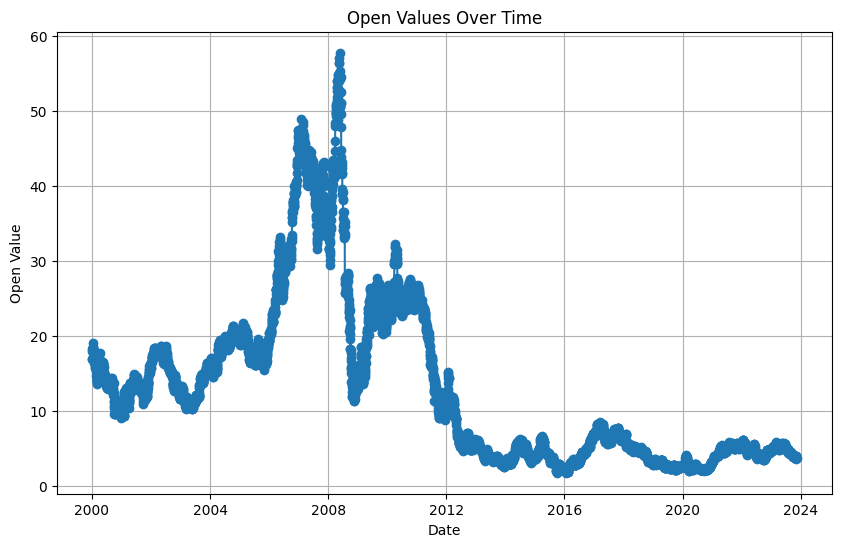

In [30]:
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Open'], marker='o', linestyle='-')
plt.title('Open Values Over Time')
plt.xlabel('Date')
plt.ylabel('Open Value')
plt.grid(True)
plt.show()